In [1]:
import os
import numpy as np
from matplotlib import pyplot
# Modulo de optimización
from scipy import optimize
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
pip install gitpython

In [4]:
from git import Repo
#clonar dataset del repositorio
url = "https://bitbucket.org/jadslim/german-traffic-signs.git"
Repo.clone_from(url, "data3")

<git.repo.base.Repo '/content/data3/.git'>

In [5]:
import pickle
with open('data3/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('data3/test.p', 'rb') as f:
    test_data = pickle.load(f)

In [6]:
X_train, y_train = train_data['features'], train_data['labels']
print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [7]:
X_test, y_test = test_data['features'], test_data['labels']
print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630,)


In [8]:
y_test


array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [9]:
import csv
def getName(num):  
  file = open("data3/signnames.csv")
  reader = csv.DictReader(file)
  classID=[]
  className=[]
  count = 0
  for row in reader:
    if count == num:
      print(row['ClassId'],row['SignName'] )
    count= count +1;
    

41 End of no passing


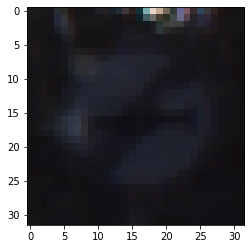

In [15]:
from skimage import io
def printImage(imageId):
  label = y_train[imageId]
  plt.imshow(X_train[imageId])

  getName(label)

printImage(200)

In [16]:
dims = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
x_train = X_train.reshape(X_train.shape[0], dims)

dims = X_test.shape[1] * X_test.shape[2] * X_test.shape[3]
x_test = X_test.reshape(X_test.shape[0], dims)

In [21]:
x_test.shape

(12630, 3072)

In [20]:
x_train.shape, y_train.shape

((34799, 3072), (34799,))

In [22]:
x_train = x_train[:34799] / 255.
y_train = y_train[:34799].astype(np.int)
x_test = x_test[:12630] / 255.
y_test = y_test[:12630].astype(np.int)
print(x_train.shape)
print(x_test.shape)


(34799, 3072)
(12630, 3072)
[[0.10980392 0.09803922 0.09411765 ... 0.10196078 0.08627451 0.07843137]
 [0.10980392 0.09411765 0.09411765 ... 0.11372549 0.10196078 0.09803922]
 [0.11372549 0.09803922 0.09803922 ... 0.11764706 0.10196078 0.09411765]
 ...
 [0.2        0.2627451  0.3372549  ... 0.1254902  0.14509804 0.18431373]
 [0.32156863 0.30588235 0.37647059 ... 0.16078431 0.16862745 0.20392157]
 [0.27058824 0.30980392 0.37647059 ... 0.22352941 0.26666667 0.31372549]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

Marca ,Número de puertas, Número de asientos, Condición del vehículo,Transmisión,Tipo de Combustible,Tipo,"Modelo (Ej: 2021, 2016)",Procedencia,Kilometraje (recorrido en Km),Cilindrada (en cc),Estado de la pintura,¿La pintura está en buen estado?,"¿El vehículo tuvo algún accidente? ","¿El vehículo cuenta con todos los accesorios? ",Costo en $us,datos_falso(1,2)

In [ ]:
'''data_train = np.loadtxt('preparado.csv', delimiter=',', dtype=float)
data_test = np.loadtxt('test.csv', delimiter=',', dtype=float)'''
#print(data_train)
#print(data_test)

In [ ]:
'''X = data_train[:,0:16]
X_test = data_test[:,0:16]
#print(X_test)'''

In [ ]:
'''y = np.where(data_train[:,16]==1, 1,0)
y = np.asarray(y, dtype=np.int)
y_test = np.where(data_test[:,16]==1, 1,0)
y_test = np.asarray(y_test, dtype=np.int)
X.shape, y.shape
'''

((1012, 16), (1012,))

In [23]:
#funciondes de activacion
def relu(x):
  return np.maximum(0, x)

def reluPrime(x):
  return x > 0

In [24]:
def linear(x):
    return x

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)

funciones de perdida

In [25]:
# Binary Cross Entropy -> usada para clasificación binaria (con sigmoid)
def bce(y, y_hat):
    return - np.mean(y.reshape(y_hat.shape)*np.log(y_hat) - (1 - y.reshape(y_hat.shape))*np.log(1 - y_hat))

# Cross Entropy (aplica softmax + cross entropy de manera estable) -> usada para clasificación multiclase
def crossentropy(y, y_hat):
    logits = y_hat[np.arange(len(y_hat)),y]
    entropy = - logits + np.log(np.sum(np.exp(y_hat),axis=-1))
    return entropy.mean()

Derivadas

In [26]:

def grad_bce(y, y_hat):
    return y_hat - y.reshape(y_hat.shape)

def grad_crossentropy(y, y_hat):
    answers = np.zeros_like(y_hat)
    answers[np.arange(len(y_hat)),y] = 1    
    return (- answers + softmax(y_hat)) / y_hat.shape[0]

In [27]:
class MLP():
  def __init__(self, D_in, H, D_out, loss, grad_loss, activation):
    # pesos de la capa 1
    self.w1, self.b1 = np.random.normal(loc=0.0,
                                  scale=np.sqrt(2/(D_in+H)),
                                  size=(D_in, H)), np.zeros(H)
    # pesos de la capa 2
    self.w2, self.b2 = np.random.normal(loc=0.0,
                                  scale=np.sqrt(2/(H+D_out)),
                                  size=(H, D_out)), np.zeros(D_out)
    self.ws = []
    # función de pérdida y derivada
    self.loss = loss
    self.grad_loss = grad_loss
    # función de activación
    self.activation = activation

  def __call__(self, x):
    # salida de la capa 1
    self.h_pre = np.dot(x, self.w1) + self.b1
    self.h = relu(self.h_pre)
    # salida del MLP
    y_hat = np.dot(self.h, self.w2) + self.b2 
    return self.activation(y_hat)
    
  def fit(self, X, Y, epochs = 100, lr = 0.001, batch_size=None, verbose=True, log_each=1):
    batch_size = len(X) if batch_size == None else batch_size
    batches = len(X) // batch_size
    l = []
    for e in range(1,epochs+1):     
        # Mini-Batch Gradient Descent
        _l = []
        for b in range(batches):
            # batch de datos
            x = X[b*batch_size:(b+1)*batch_size]
            y = Y[b*batch_size:(b+1)*batch_size] 
            # salida del perceptrón
            y_pred = self(x) 
            # función de pérdida
            loss = self.loss(y, y_pred)
            _l.append(loss)        
            # Backprop 
            dldy = self.grad_loss(y, y_pred) 
            grad_w2 = np.dot(self.h.T, dldy)
            grad_b2 = dldy.mean(axis=0)
            dldh = np.dot(dldy, self.w2.T)*reluPrime(self.h_pre)      
            grad_w1 = np.dot(x.T, dldh)
            grad_b1 = dldh.mean(axis=0)
            # Update (GD)
            self.w1 = self.w1 - lr * grad_w1
            self.b1 = self.b1 - lr * grad_b1
            self.w2 = self.w2 - lr * grad_w2
            self.b2 = self.b2 - lr * grad_b2
        l.append(np.mean(_l))
        # guardamos pesos intermedios para visualización
        self.ws.append((
            self.w1.copy(),
            self.b1.copy(),
            self.w2.copy(),
            self.b2.copy()
        ))
        if verbose and not e % log_each:
            print(f'Epoch: {e}/{epochs}, Loss: {np.mean(l):.5f}')

  def predict(self, ws, x):
    w1, b1, w2, b2 = ws
    h = relu(np.dot(x, w1) + b1)
    y_hat = np.dot(h, w2) + b2
    return self.activation(y_hat)

In [28]:
# MLP para clasificación binaria
class MLPBinaryClassification(MLP):
    def __init__(self, D_in, H, D_out):
        super().__init__(D_in, H, D_out, bce, grad_bce, sigmoid)

# MLP para clasificación multiclase
class MLPClassification(MLP):
    def __init__(self, D_in, H, D_out):
        super().__init__(D_in, H, D_out, crossentropy, grad_crossentropy, linear)

In [31]:
# normalización datos
#X_mean = X.mean(axis=0)
#X_std = X.std(axis=0)
#X_norm = (X - X_mean) / X_std


Epoch: 10/100, Loss: 0.04959
Epoch: 20/100, Loss: 0.00401
Epoch: 30/100, Loss: -0.01507
Epoch: 40/100, Loss: -0.02532
Epoch: 50/100, Loss: -0.03126
Epoch: 60/100, Loss: -0.03490
Epoch: 70/100, Loss: -0.03732
Epoch: 80/100, Loss: -0.03896
Epoch: 90/100, Loss: -0.04001
Epoch: 100/100, Loss: -0.04067


In [ ]:
model2 = MLPClassification(D_in=3072, H=100, D_out=43)
epochs = 1000
lr = 0.8
model2.fit(x_train, y_train, epochs, lr, batch_size=1000, log_each=10)

Epoch: 10/1000, Loss: 4.50726
Epoch: 20/1000, Loss: 4.13158
Epoch: 30/1000, Loss: 4.00511
Epoch: 40/1000, Loss: 3.94095
Epoch: 50/1000, Loss: 3.90173
Epoch: 60/1000, Loss: 3.87498
Epoch: 70/1000, Loss: 3.85537
Epoch: 80/1000, Loss: 3.84023
Epoch: 90/1000, Loss: 3.82806
Epoch: 100/1000, Loss: 3.81799
Epoch: 110/1000, Loss: 3.80944
Epoch: 120/1000, Loss: 3.80205
Epoch: 130/1000, Loss: 3.79553
Epoch: 140/1000, Loss: 3.78972
Epoch: 150/1000, Loss: 3.78447
Epoch: 160/1000, Loss: 3.77968
Epoch: 170/1000, Loss: 3.77527
Epoch: 180/1000, Loss: 3.77118
Epoch: 190/1000, Loss: 3.76736
Epoch: 200/1000, Loss: 3.76377
Epoch: 210/1000, Loss: 3.76039
Epoch: 220/1000, Loss: 3.75718
Epoch: 230/1000, Loss: 3.75412
Epoch: 240/1000, Loss: 3.75120
Epoch: 250/1000, Loss: 3.74840
Epoch: 260/1000, Loss: 3.74572
Epoch: 270/1000, Loss: 3.74313
Epoch: 280/1000, Loss: 3.74063
Epoch: 290/1000, Loss: 3.73821
Epoch: 300/1000, Loss: 3.73587
Epoch: 310/1000, Loss: 3.73359
Epoch: 320/1000, Loss: 3.73138
Epoch: 330/1000, 

modelo Uno con datos de prueba

In [ ]:
'''w=model.ws[99]
X_norm_test1 = (X_test - X_mean) / X_std
y_predict = model.predict(w, X_norm_test1)
for i in y_predict:
    print(np.argmax(i))'''

0
0
0
0
0
0
0
0
0
0
0


Modelo 2 con datos de prueba

In [ ]:
#X_norm_test = (X_test - X_mean) / X_std
y_predict = model2.predict(model2.ws[999], x_test)
y_predict_test=[]
for i in y_predict:
    y_predict_test.append(np.argmax(i))
    #print(np.argmax(i))

1
1
1
0
1
0
1
0
0
0
0


In [ ]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
y_predict_ = model2.predict(model2.ws[999], x_train)
y_pred_train=[]
for i in y_predict_:
    y_pred_train.append(np.argmax(i))
    #print(np.argmax(i))

In [ ]:
def accuracy(y_pred, y):
    return np.sum(y_pred == y) / len(y)

precisión con datos te entrenamiento

In [ ]:
accuracy(y_pred_train, y_train)

0.9940711462450593

con datos de prueba

In [ ]:
accuracy(y_predict_test,y_test)

0.8181818181818182